In [3]:
!pip install autokeras -q

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [5]:
import keras

In [6]:
keras.__version__

'2.8.0'

In [7]:
import tensorflow as tf

In [8]:
tf.keras.__version__

'2.8.0'

In [9]:
from sklearn.datasets import load_breast_cancer

In [10]:
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [11]:
# ładowanie klasy z Autokeras
from autokeras import StructuredDataClassifier

In [12]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, test_size=.2)

In [ ]:
autokeras_ml = StructuredDataClassifier(max_trials=5)
autokeras_ml.fit(X_train, y_train)

In [ ]:
loss, acc = autokeras_ml.evaluate(X_test, y_test, verbose=0)
loss, acc

In [ ]:
model = autokeras_ml.export_model()

In [ ]:
model.summary()

In [ ]:
X_test[11:12]

In [ ]:
model.predict(X_test[11:12])

In [ ]:
y_test[11:12]

In [ ]:
# Autokeras w regresji
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler

ds = load_boston()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target

In [ ]:
X = df.iloc[:, :-1]
y = df.MEDV

# normalizacja
#X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [14]:
from autokeras import StructuredDataRegressor

In [ ]:
autokeras_ai = StructuredDataRegressor(max_trials=5, loss="mae")
autokeras_ai.fit(X_train, y_train)

In [ ]:
model = autokeras_ai.export_model()

In [ ]:
model.summary()

In [22]:
from sklearn.metrics import r2_score

In [ ]:
autokeras_ai.evaluate(X_test, y_test)

In [ ]:
autokeras_ai.predict(X_test[:3])

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model1 = Sequential.from_config(model.get_config())
model.save_weights("wagi", save_format='tf')
model1.load_weights("wagi")

In [ ]:
type(model)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
y_pred[:10]

In [ ]:
autokeras_ai.predict(X[:1])

In [15]:
import numpy as np
from sklearn.datasets import fetch_california_housing

house_dataset = fetch_california_housing()
df = pd.DataFrame(
    np.concatenate(
        (house_dataset.data, house_dataset.target.reshape(-1, 1)), axis=1
    ),
    columns=house_dataset.feature_names + ["Price"],
)
train_size = int(df.shape[0] * 0.9)
df[:train_size].to_csv("train.csv", index=False)
df[train_size:].to_csv("eval.csv", index=False)
train_file_path = "train.csv"
test_file_path = "eval.csv"

In [16]:
# Initialize the structured data regressor.
reg = StructuredDataRegressor(
    overwrite=True, max_trials=3
)  # It tries 3 different models.
# Feed the structured data regressor with training data.
reg.fit(
    # The path to the train.csv file.
    train_file_path,
    # The name of the label column.
    "Price",
    epochs=10,
)
# Predict with the best model.
predicted_y = reg.predict(test_file_path)
# Evaluate the best model with testing data.
print(reg.evaluate(test_file_path, "Price"))


Trial 3 Complete [00h 00m 26s]
val_loss: 0.89969801902771

Best val_loss So Far: 0.8750770092010498
Total elapsed time: 00h 01m 18s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
581/581 [==============================] - 2s 2ms/step - loss: 1.1179 - mean_squared_error: 1.1179
Epoch 2/10
581/581 [==============================] - 1s 2ms/step - loss: 0.6075 - mean_squared_error: 0.6075
Epoch 3/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5457 - mean_squared_error: 0.5457
Epoch 4/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5265 - mean_squared_error: 0.5265
Epoch 5/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5140 - mean_squared_error: 0.5140
Epoch 6/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5074 - mean_squared_error: 0.5074
Epoch 7/10
581/581 [==============================] - 1s 2ms/step - loss: 0.5006 - mean_squared_error: 0.5006
Epoch 8/10
581/581 [==============================] - 1s 2ms

In [17]:
model = reg.export_model()

In [18]:
y_pred = model.predict(df[train_size:].iloc[:, :-1])
y_pred

array([[1.3512282],
       [1.5916896],
       [1.526486 ],
       ...,
       [1.7876022],
       [1.8822197],
       [1.7382846]], dtype=float32)

In [19]:
tmp = pd.DataFrame()
tmp["kol1"] = pd.Series(y_pred.flatten())
tmp["kol2"] = df[train_size:].Price.reset_index(drop=True)
tmp

,kol1,kol2
0,1.351228,1.214
1,1.591690,1.904
2,1.526486,1.843
3,1.840640,1.900
4,1.396907,1.697
...,...,...
2059,1.565757,0.781
2060,1.319014,0.771
2061,1.787602,0.923
2062,1.882220,0.847


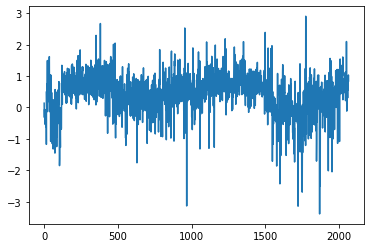

In [20]:
import matplotlib.pyplot as plt

plt.plot( tmp.kol1 - tmp.kol2 )

In [23]:
r2_score(tmp.kol2, tmp.kol1)

0.28273043121207253